# **Downloading data**

In [5]:
import opendatasets as od
od.download('stackoverflow-developer-survey-2020')

94609408it [01:17, 1214133.83it/s]                              


16384it [00:00, 19175.32it/s]           


8192it [00:00, 9226.49it/s]             


In [6]:
import os
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

# Let's Start here..

In [776]:
import pandas as pd

In [777]:
schema_raw = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_schema.csv', index_col='Column')

In [778]:
schema_raw

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [779]:
survey_raw = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')
survey_raw.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [780]:
survey_raw.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


Focusing on the following information about the respondant;

In [781]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [782]:
survey_df = survey_raw[selected_columns]
schema_df = schema_raw.loc[selected_columns]

In [783]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [784]:
survey_df.shape

(64461, 20)

In [785]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

**Cleaning**

Some columns values are recognised as object, we need to convert that to numeric;

In [786]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\2210035734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\2210035734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\2210035734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [787]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses.

In [788]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\421355944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\421355944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)


In [789]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


In [790]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\3417848944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)


In [791]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [792]:
survey_df.loc[[2258]]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
2258,United States,21.0,"Woman;Non-binary, genderqueer, or gender non-c...",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,10.0,11.0,NaN,Assembly;C;C#;C++;HTML/CSS;JavaScript;Python;R...,Assembly;C#;TypeScript,Every few months,Play games;Go for a walk or other physical act...,"Not employed, but looking for work","Developer, back-end;Developer, desktop or ente...",NaN,NaN,NaN,NaN,Fairly important


In [793]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [794]:
import numpy as np
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)), np.nan, inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\2275251157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df.where(~(survey_df.Gender.str.contains(';',na=False)), np.nan, inplace=True)


Now, It's either Man or Woman now, apart from NaN

Done Cleaning

# EDA AND VISUALIZATION

In [795]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Country**

In [796]:
first10 = survey_df.Country.value_counts().head(10)

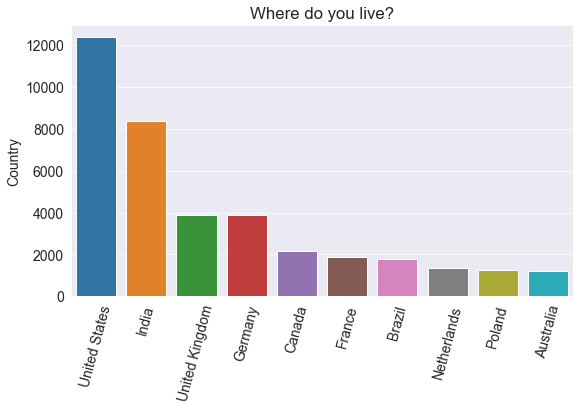

In [797]:
plt.title(schema_df.QuestionText.Country)
plt.xticks(rotation=75)
sns.barplot(x=first10.index, y=first10);

The Visualization shows that the higher number of respondants are from English speaking country, moreover, Stackoverflow is an English speaking platform So, this indicated that that the survey may not be representative of the global programming community - especially from non-English speaking countries. 

Showing the percentage of responds from English speaking and non-English speaking country

In [798]:
countries_lan = pd.read_csv('stackoverflow-developer-survey-2020/countries-languages.csv')
count_speak = survey_df.merge(countries_lan, on='Country')

In [799]:
speak_eng = count_speak['Languages Spoken'].str.contains('English').value_counts()

Percentage of repondants that speak English

In [800]:
english_speak = (speak_eng[True]/survey_df.shape[0])*100
english_speak

60.095480981556925

Percentage of respondants that  doesn't speak English

In [801]:
notenglish = (speak_eng[False]/survey_df.shape[0])*100
notenglish

35.51612602245513

Number of respondants that speaks only English

In [802]:
pure_eng = len(count_speak[count_speak['Languages Spoken']=='English'])

In [803]:
pure_eng

5

**Age**

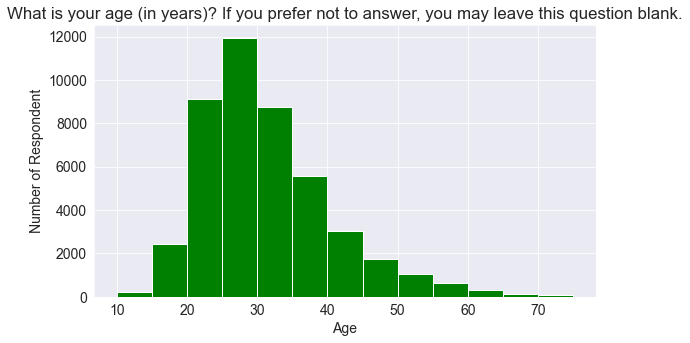

In [804]:
plt.title(schema_df.QuestionText.Age)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Respondent', fontsize=14)
plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='green');

Thi shows many respondent are at the age of range 20-45 and this also shows the trend in the tech field as many young people between the age of 20-30 are now showing more interest in computer science and technology.

> Categorizing the ages to show more clearly, the age range with highest number respondant

In [805]:
survey_df['AgeGroup'] = pd.cut(survey_df['Age'], bins=[0,10,18,30,45,60,100])

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\1461528151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['AgeGroup'] = pd.cut(survey_df['Age'], bins=[0,10,18,30,45,60,100])


In [806]:
count = survey_df.AgeGroup.value_counts()
age_group = survey_df.AgeGroup.unique().dropna()

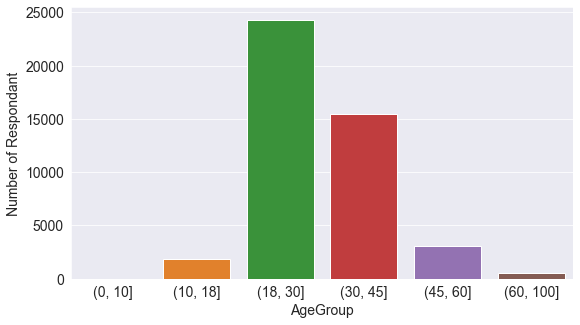

In [807]:
plt.xlabel('AgeGroup', fontsize=14)
plt.ylabel('Number of Respondant', fontsize=14)
plot = sns.barplot(x=age_group, y= count);
plot.set(xlabel='AgeGroup', ylabel='Number of Respondant');

**Gender**

In [808]:
gender_count = survey_df.Gender.value_counts()

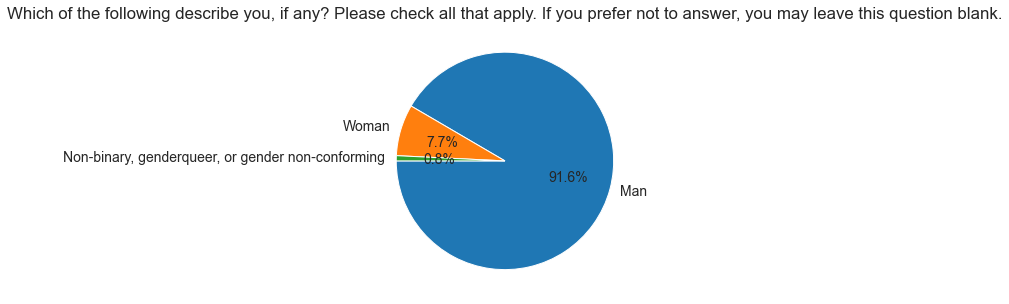

In [809]:
plt.title(schema_df.QuestionText.Gender)
plt.pie(gender_count, labels=gender_count.index, startangle=180, autopct='%1.1f%%');

This shows the percentage of both man and woman who anwsered or respond to the survey question.

**Q: How does the educational level differ among Genders?**

In [810]:
ed_gen_count = survey_df.groupby(['EdLevel','Gender'])['Gender'].count()
count_gender = pd.DataFrame(ed_gen_count.rename('Count')).reset_index()

In [811]:
pd.DataFrame(ed_gen_count).head(6)

Gender
EdLevel                                      Gender                                                   
Associate degree (A.A., A.S., etc.)          Man                                                  1484
                                             Non-binary, genderqueer, or gender non-conforming      14
                                             Woman                                                 101
Bachelor’s degree (B.A., B.S., B.Eng., etc.) Man                                                 20493
                                             Non-binary, genderqueer, or gender non-conforming     139
                                             Woman                                                1924

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


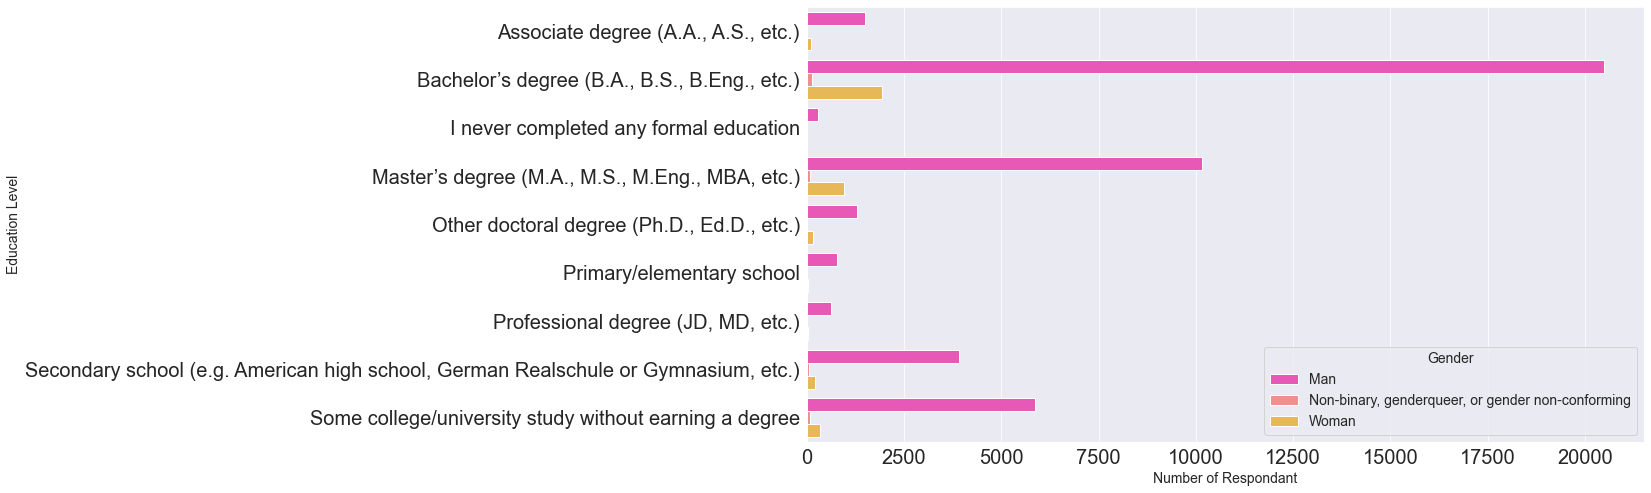

In [812]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15, loc='lower right')
plot = sns.barplot(y='EdLevel', x='Count', hue='Gender', data=count_gender, palette='spring')
plot.set(ylabel='Education Level', xlabel='Number of Respondant');

**Education Level**

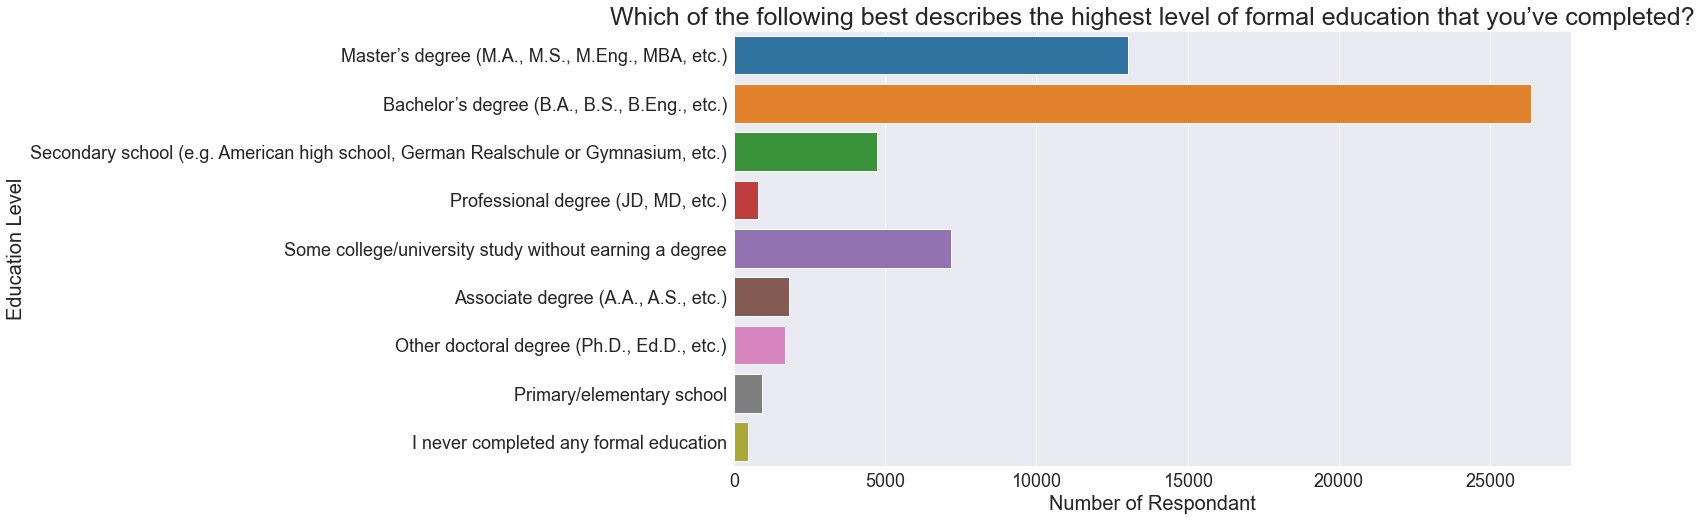

In [813]:
plt.figure(figsize=(15,8))
plt.title(schema_raw.QuestionText.EdLevel, fontsize=25)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.xlabel('xlabel', fontsize=20)
plt.ylabel('ylabel', fontsize=20)
plot = sns.countplot(y=survey_df.EdLevel);
plot.set(xlabel='Number of Respondant', ylabel='Education Level');

The plot shows that majority of the respondants hold a Bachelor's or Master's degree.

**Q: Comparing the percentages for each degree for men vs. women.**

In [814]:
individual_num = pd.DataFrame(ed_gen_count)
total_num = pd.DataFrame(survey_df.groupby(['EdLevel'])['Gender'].count())

In [815]:
perc_each = 100 * (individual_num/total_num)
perc_each = perc_each['Gender'].rename('Percentage').reset_index()

In [816]:
perc_each.head()

,EdLevel,Gender,Percentage
0,"Associate degree (A.A., A.S., etc.)",Man,92.808005
1,"Associate degree (A.A., A.S., etc.)","Non-binary, genderqueer, or gender non-conforming",0.875547
2,"Associate degree (A.A., A.S., etc.)",Woman,6.316448
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Man,90.853875
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Non-binary, genderqueer, or gender non-conforming",0.616244


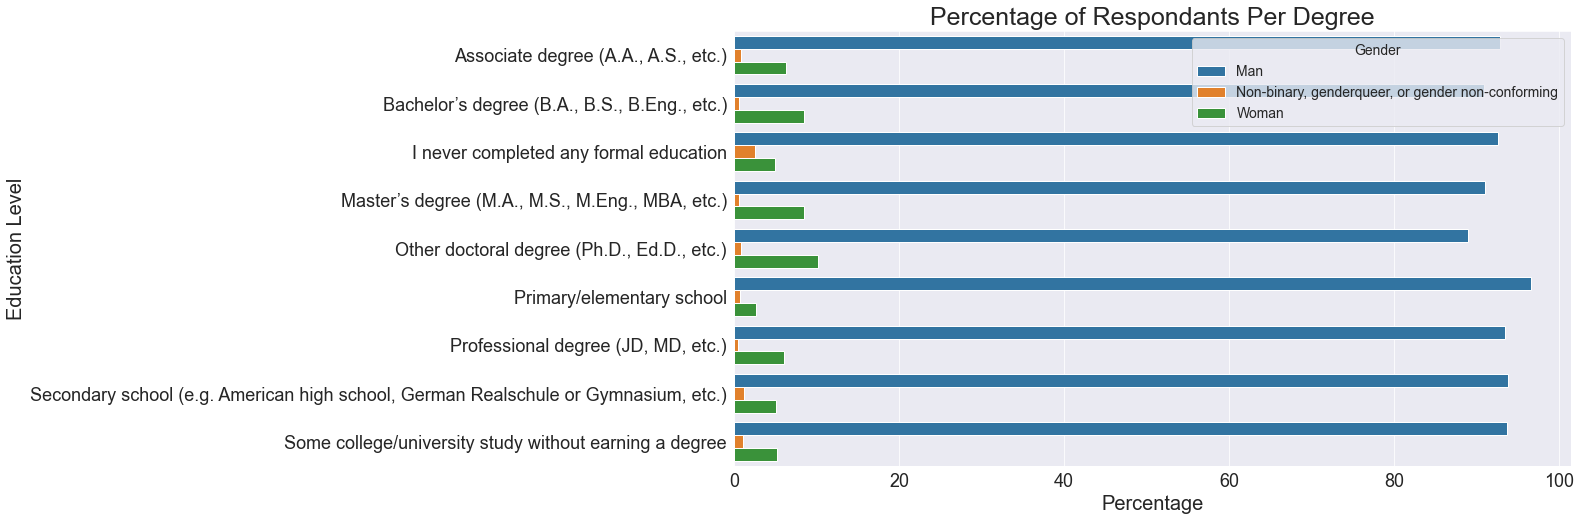

In [817]:
plt.figure(figsize=(15,8))
plt.title('Percentage of Respondants Per Degree', fontsize=25)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.xlabel('xlabel', fontsize=20)
plt.ylabel('ylabel', fontsize=20)
plot = sns.barplot(x=perc_each.Percentage, y=perc_each.EdLevel, hue= perc_each.Gender);
plot.set(xlabel='Percentage', ylabel='Education Level');

In [818]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,"(18.0, 30.0]"
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,"(30.0, 45.0]"


**Undergrad**

Checking the percentage of those that studied different course other than Computer Science/ Engineering.

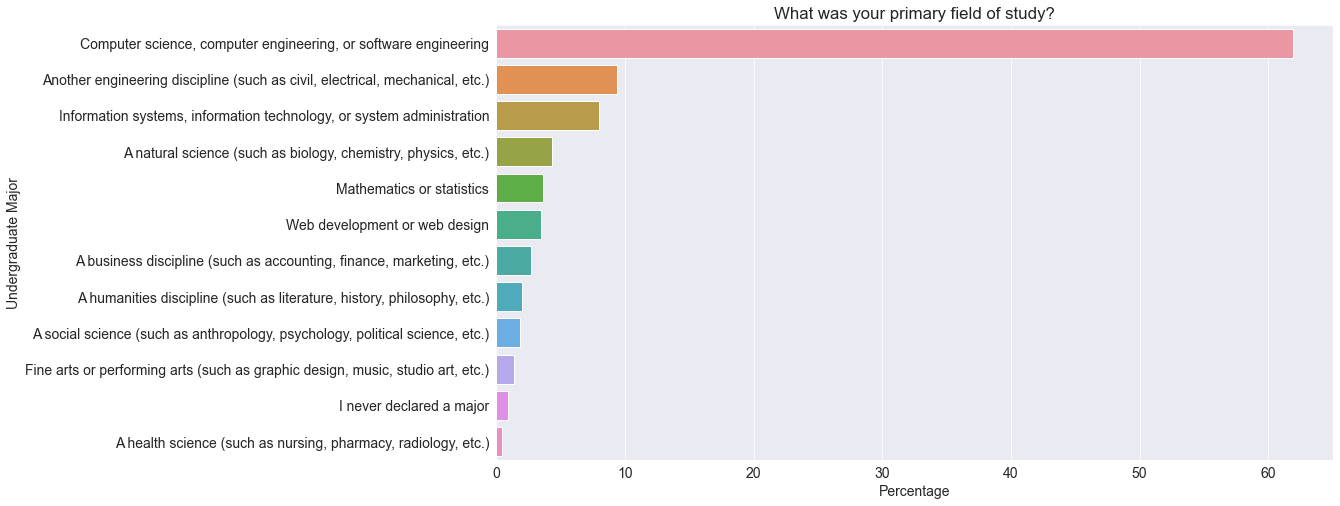

In [819]:
undergrad_perc = survey_df.UndergradMajor.value_counts() *100 /survey_df.UndergradMajor.count()
plt.figure(figsize=(15,8))
sns.barplot(x=undergrad_perc, y=undergrad_perc.index);
plt.title(schema_df.QuestionText.UndergradMajor)
plt.xlabel('Percentage')
plt.ylabel('Undergraduate Major');

It turns out that close to 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

**Q: Analyzing the NEWEdImpt column for respondents who hold some college degree vs. those who don't. Let's derive something out of it.**

In [820]:
schema_df.QuestionText.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [821]:
ed_imp = survey_df.groupby(['UndergradMajor', 'NEWEdImpt'])['NEWEdImpt'].count()
total_imp = survey_df.groupby(['UndergradMajor'])['NEWEdImpt'].count()

In [822]:
ed_imp_perc = ed_imp*100/total_imp
comp_imp_perc = ed_imp_perc.rename('Percentage').reset_index()
comp_imp_perc

,UndergradMajor,NEWEdImpt,Percentage
0,"A business discipline (such as accounting, fin...",Critically important,3.673469
1,"A business discipline (such as accounting, fin...",Fairly important,19.183673
2,"A business discipline (such as accounting, fin...",Not at all important/not necessary,32.734694
3,"A business discipline (such as accounting, fin...",Somewhat important,29.959184
4,"A business discipline (such as accounting, fin...",Very important,14.448980
5,"A health science (such as nursing, pharmacy, r...",Critically important,13.197970
6,"A health science (such as nursing, pharmacy, r...",Fairly important,13.197970
7,"A health science (such as nursing, pharmacy, r...",Not at all important/not necessary,36.040609
8,"A health science (such as nursing, pharmacy, r...",Somewhat important,25.380711
9,"A health science (such as nursing, pharmacy, r...",Very important,12.182741


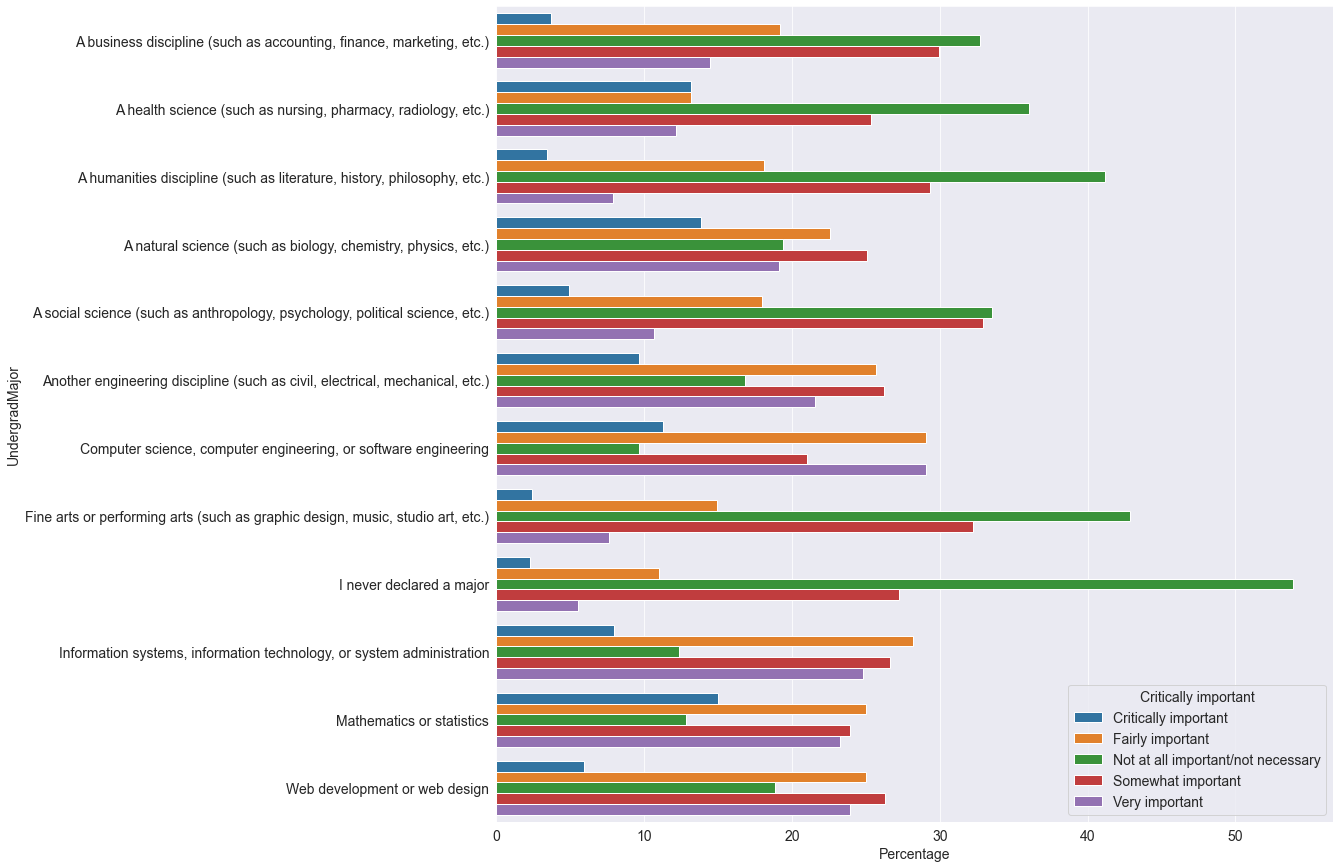

In [823]:
plt.figure(figsize=(15,15))
sns.barplot(y=comp_imp_perc.UndergradMajor, x=comp_imp_perc.Percentage, hue=comp_imp_perc.NEWEdImpt)
plt.legend(title = 'Critically important', loc='lower right');

Respondants that majored/majoring in Mathematics or statistics have the highest percentage (about 15% of them) number of people who believe Computer Science degree is critically important, this shows that majority believe it's not really important.

Respondants that are yet to have a major have the highest percentage (about 55% of them) number of people who believed; getting a degree in Computer science is not necessary.
Majority of the respondants that has Computer Science/Engineering or Software Engineering degree believe it is Very and fairly important to have a degree in Computer Science.

**Employment**

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the Employment column.

In [824]:
schema_df.QuestionText.Employment

'Which of the following best describes your current employment status?'

<AxesSubplot:xlabel='count', ylabel='Employment'>

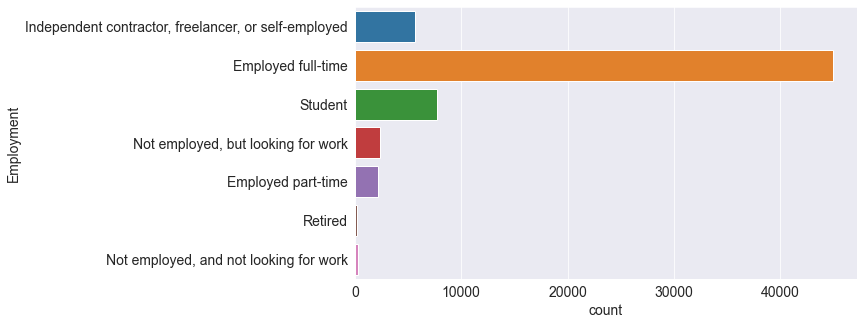

In [825]:
sns.countplot(y = 'Employment', data=survey_df)

Let's plot their respective percentage

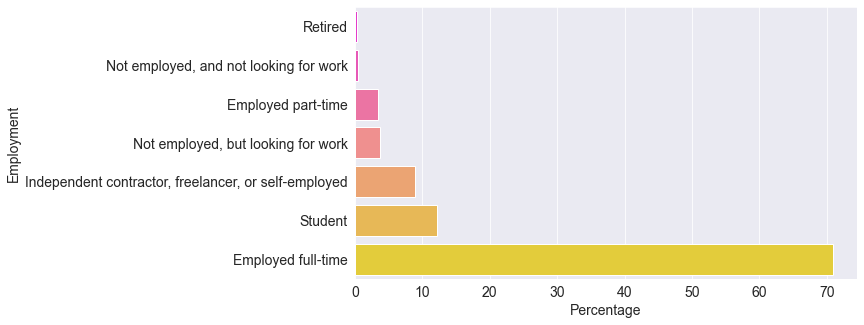

In [826]:
empl_perc = survey_df.Employment.value_counts(normalize=True, ascending=True)*100
sns.barplot(x=empl_perc, y=empl_perc.index, palette='spring');
plt.xlabel('Percentage')
plt.ylabel('Employment');

This shows almost 30% are not employed full-time and majority of the 30% are students. From the analysis, one could conclude that there's an higher rate of employment in Computer programming domain or Tech at large.

**Q: Making a comparison the employment status by categorising it into 'Professional', 'Enthusiast', and 'Other'.**

In [827]:
survey_df['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [828]:
employment_table = survey_df[['Employment']]
employment_table['EmploymentType'] = 'Others'

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\4163251670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_table['EmploymentType'] = 'Others'


Belows are the condition and the respective title, this can also be done using the pd.DataFrame.where(~(condition), other=new_value, inplace=True)

In [829]:
emp = employment_table

In [830]:
emp.loc[(emp['Employment']=='Employed full-time')|(emp['Employment']=='Employed part-time')|(emp['Employment']=='Independent contractor, freelancer, or self-employed'), 'EmploymentType'] = 'Professional'
emp.loc[(emp['Employment']=='Student')|(emp['Employment']=='Not employed, but looking for work')|(emp['Employment']=='Not employed, and not looking for work'),'EmploymentType'] = 'Enthusiast'
emp.dropna(axis=0,inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\14120465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp.dropna(axis=0,inplace=True)


In [831]:
emp.sample(10)

,Employment,EmploymentType
50871,Student,Enthusiast
26223,"Independent contractor, freelancer, or self-em...",Professional
37434,Employed full-time,Professional
14247,Employed part-time,Professional
36957,Employed full-time,Professional
60594,Employed full-time,Professional
47545,Employed full-time,Professional
44259,Employed full-time,Professional
39659,Employed full-time,Professional
38346,Employed full-time,Professional


In [832]:
prof_enth = emp.groupby('EmploymentType')['Employment'].count()

Percentage of respondants in  'Professional', 'Enthusiast', and 'Other'.

In [833]:
perc_emp = prof_enth*100/emp.shape[0]
perc_emp

EmploymentType
Enthusiast      16.367480
Others           0.380162
Professional    83.252358
Name: Employment, dtype: float64

In [834]:
perc_emp.index

Index(['Enthusiast', 'Others', 'Professional'], dtype='object', name='EmploymentType')

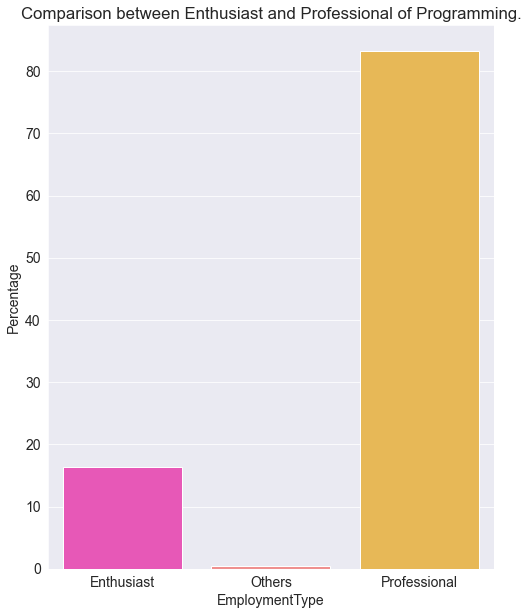

In [835]:
plt.figure(figsize=(8,10))
sns.barplot(x=perc_emp.index, y=perc_emp, palette='spring');
plt.title('Comparison between Enthusiast and Professional of Programming.')
plt.ylabel('Percentage');

The plot shows majority of the respondants in the community are Professional.

**DevType**

In [836]:
schema_df.QuestionText.DevType

'Which of the following describe you? Please select all that apply.'

In [837]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,"(18.0, 30.0]"
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,"(30.0, 45.0]"


In [838]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

The data in the column is a bit complex so, a thorough analysis is needed;

The function below is used to split the entry as a person might hold more than one role.

In [839]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
#   The function return a frame of the splitted role
    return result_df[options]

In [840]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [841]:
# at default, it sum the number of 'True' value present 
dev_type_df.sum().sort_values(ascending=False)

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might expect, the most common roles include "Developer" in the name.

**Q: Percentage of respondants that work in a role related to Data science**

In [842]:
role_num = dev_type_df.sum().sort_values(ascending=False).rename('Count')

In [843]:
role_num.sum()

155571

In [844]:
def working_role(data, common_name):
    num = []
    for value in data.index:
        if (common_name) in value.lower():
            num.append(data[value])
    return sum(num)

In [845]:
ds_sum = working_role(role_num, 'data')

In [846]:
perct_ds = print("{:.2f}".format(ds_sum*100/role_num.sum()))
perct_ds

11.10


11.12% of the respondants are working in a Data field.

In [847]:
developer = working_role(role_num, 'developer')
per_developer = print("{:.2f}".format(developer*100/role_num.sum()))

67.16


67.09% of the respondants are working as a developer.

**Q: Which role has the highest percentage of women?**

In [848]:
m_w = survey_df.groupby('DevType')['Gender'].value_counts().rename('Count').reset_index()

In [849]:
m_w

,DevType,Gender,Count
0,Academic researcher,Man,138
1,Academic researcher,Woman,27
2,Academic researcher,"Non-binary, genderqueer, or gender non-conforming",4
3,Academic researcher;Data or business analyst,Man,17
4,Academic researcher;Data or business analyst,Woman,1
...,...,...,...
8192,Senior executive/VP,Man,79
8193,Senior executive/VP,Woman,5
8194,Senior executive/VP;System administrator,Man,4
8195,System administrator,Man,123


In [850]:
men_women = m_w.groupby(['Gender', 'DevType'])['Count'].sum().reset_index()

In [851]:
men_women[men_women.Gender=='Woman'].sort_values(by='Count', ascending=False)

,Gender,DevType,Count
8153,Woman,"Developer, full-stack",384
7913,Woman,"Developer, back-end",271
8120,Woman,"Developer, front-end",235
8005,Woman,"Developer, back-end;Developer, front-end;Devel...",141
8178,Woman,"Developer, mobile",105
...,...,...,...
7717,Woman,"Database administrator;Designer;Developer, des...",1
7718,Woman,"Database administrator;Designer;Developer, emb...",1
7720,Woman,"Database administrator;Designer;Developer, ful...",1
7721,Woman,"Database administrator;Designer;Developer, ful...",1


Developer role still has the highest number of respondants as women.

In [852]:
men_women[men_women.Gender=='Man'].sort_values(by='Count', ascending=False)

,Gender,DevType,Count
6964,Man,"Developer, full-stack",3373
5286,Man,"Developer, back-end",2325
6073,Man,"Developer, back-end;Developer, front-end;Devel...",1838
6322,Man,"Developer, back-end;Developer, full-stack",1200
7132,Man,"Developer, mobile",938
...,...,...,...
2620,Man,"Data or business analyst;Developer, back-end;D...",1
2618,Man,"Data or business analyst;Developer, back-end;D...",1
2617,Man,"Data or business analyst;Developer, back-end;D...",1
2616,Man,"Data or business analyst;Developer, back-end;D...",1


The same thing goes for men too, majority / higher percentage of male respondants has a developer role especially,Developer, full-stack.  

**Q: How many respondants are satisfied with their current job?**

In [853]:
schema_df.QuestionText.JobSat

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [854]:
perc_satisfaction = (survey_df.JobSat.value_counts(normalize=True)*100).rename('Percentage')

In [855]:
perc_satisfaction

Very satisfied                        32.345266
Slightly satisfied                    30.804059
Slightly dissatisfied                 15.768931
Neither satisfied nor dissatisfied    12.818111
Very dissatisfied                      8.263633
Name: Percentage, dtype: float64

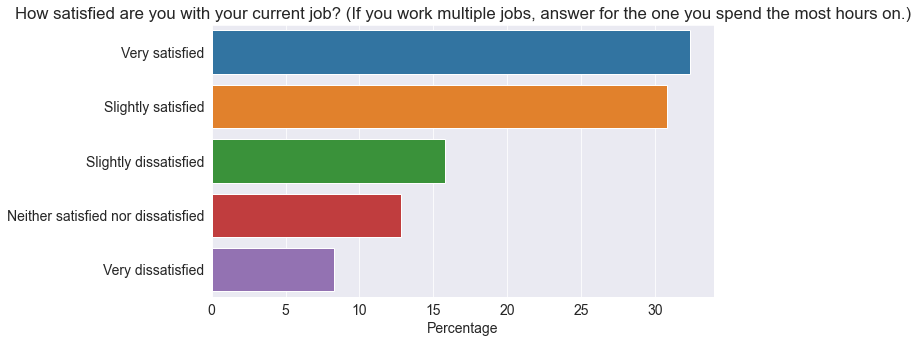

In [856]:
plt.title(schema_df.QuestionText.JobSat)
sns.barplot(x=perc_satisfaction, y=perc_satisfaction.index);

This shows it's only small number of respondants who are totally dissatisfied with their current job. While, a higher percentage of them are satisfied with their job. 

In [857]:
schema_df.QuestionText.JobFactors

'Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?'

**Q: What are the Factors that matter the most to majority of the respondants.**

In [858]:
choice_df = survey_df.JobFactors.to_frame()
split_ch = []
for ind, value in survey_df.JobFactors[survey_df.JobFactors.notnull()].iteritems():
    for option in value.split(';'):
        if option not in choice_df:
            split_ch.append(option)
            choice_df[option] = False
        choice_df.at[ind, option] = True

In [859]:
choice_df[split_ch].sum().sort_values(ascending=False)

Languages, frameworks, and other technologies I’d be working with         25146
Office environment or company culture                                     21801
Flex time or a flexible schedule                                          21483
Opportunities for professional development                                20266
Remote work options                                                       16290
How widely used or impactful my work output would be                      10205
Industry that I’d be working in                                            7513
Family friendliness                                                        5938
Financial performance or funding status of the company or organization     5855
Specific department or team I’d be working on                              5764
Diversity of the company or organization                                   3300
dtype: int64

The above estimation shows, majority of the respondants are more concerned with Languages, frameworks, and other technologies they would be working with.

**Q: What does most of respondants do when stucked on a problem?  Let's find out...**

In [860]:
schema_df.QuestionText.NEWStuck

'What do you do when you get stuck on a problem? Select all that apply.'

In [861]:
stuck_pr = split_multicolumn(survey_df.NEWStuck)
stuck_pr.sum().sort_values(ascending=False)

Visit Stack Overflow                                49414
Do other work and come back later                   29666
Watch help / tutorial videos                        28800
Call a coworker or friend                           27186
Go for a walk or other physical activity            23586
Play games                                           8162
Meditate                                             6352
Panic                                                5906
Visit another developer community (please name):     5581
dtype: int64

Obviously, a lot of techies/programmer visit StackOverflow when encountered problem. Moreover, it explained why the respondants filled the survey form.

**Q: Which Language does the respondants enjoyed using? Let's see...**

In [862]:
schema_df.QuestionText.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [863]:
language = split_multicolumn(survey_df.LanguageWorkedWith)
language.sum().sort_values(ascending=False)

JavaScript               38515
HTML/CSS                 35884
SQL                      31153
Python                   25080
Java                     22905
Bash/Shell/PowerShell    18803
C#                       17879
PHP                      14874
TypeScript               14444
C++                      13578
C                        12370
Go                        4989
Kotlin                    4429
Ruby                      4006
Assembly                  3503
VBA                       3469
Swift                     3361
R                         3257
Rust                      2893
Objective-C               2317
Dart                      2262
Scala                     2026
Perl                      1773
Haskell                   1197
Julia                      503
dtype: int64

Many of the respondants like using JavaScript

# Asking and Answering Questions

**Q: The most popular programming Language?**

In [864]:
perc_pop = language.mean().sort_values(ascending=False)*100
perc_pop

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

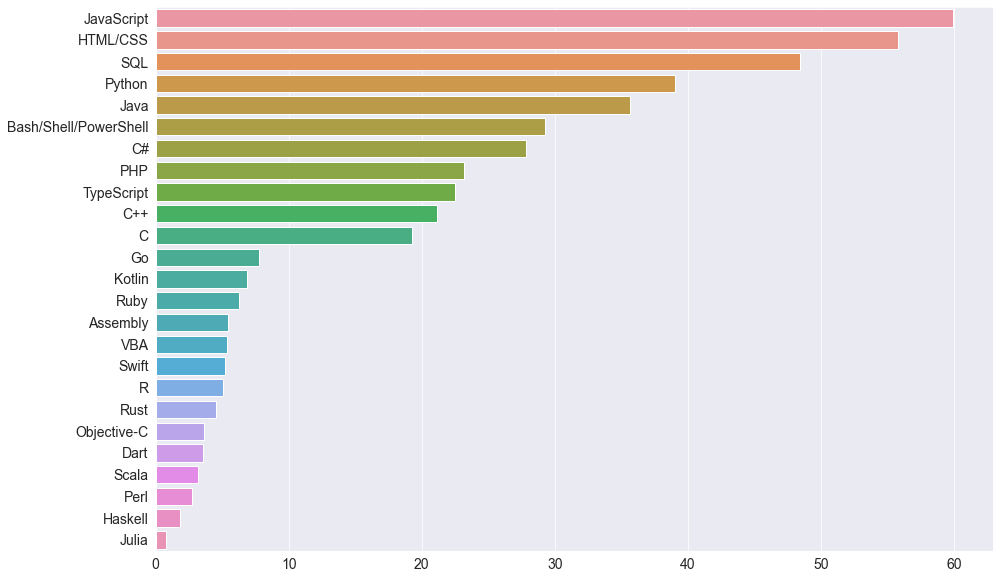

In [865]:
plt.figure(figsize=(15,10))
sns.barplot(x=perc_pop, y=perc_pop.index);

JavaScript top the list as web development is one of the most sought skill today.

**Q: What is the most common language used by students? compare it with the most common language used by professional**

In [866]:
employment_status = survey_df[['Employment']]
emp = employment_status
emp['EmploymentType'] = 'Others'

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\3886916504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp['EmploymentType'] = 'Others'


In [867]:
emp.loc[(emp['Employment']=='Employed full-time')|(emp['Employment']=='Employed part-time')|(emp['Employment']=='Independent contractor, freelancer, or self-employed'), 'EmploymentType'] = 'Professional'
emp.loc[(emp['Employment']=='Student')|(emp['Employment']=='Not employed, but looking for work')|(emp['Employment']=='Not employed, and not looking for work'),'EmploymentType'] = 'Student'

In [868]:
emp.sample(4)

,Employment,EmploymentType
30983,Employed full-time,Professional
52494,Employed full-time,Professional
16876,Employed full-time,Professional
58630,Employed full-time,Professional


In [869]:
common_lag = emp[['EmploymentType']].join(language)

In [870]:
common_lag[common_lag['EmploymentType']=='Student'][common_lag.columns[1:]].sum().sort_values(ascending=False)

HTML/CSS                 6194
JavaScript               5517
Python                   5437
Java                     4730
SQL                      4183
C++                      3908
C                        3799
Bash/Shell/PowerShell    2505
PHP                      2482
C#                       2467
TypeScript               1275
Assembly                 1221
Rust                      706
R                         700
Kotlin                    684
Go                        605
Dart                      510
Ruby                      471
Swift                     467
VBA                       421
Haskell                   362
Objective-C               218
Scala                     194
Perl                      158
Julia                     122
dtype: int64

Most common Languages are HTML/CSS, followed by JavaScript then Python. This is relatable as many students have so much interest in web development now.

The professional;

In [871]:
common_lag[common_lag['EmploymentType']=='Professional'][common_lag.columns[1:]].sum().sort_values(ascending=False)

JavaScript               32752
HTML/CSS                 29432
SQL                      26767
Python                   19442
Java                     18014
Bash/Shell/PowerShell    16168
C#                       15294
TypeScript               13110
PHP                      12265
C++                       9541
C                         8441
Go                        4355
Kotlin                    3709
Ruby                      3510
VBA                       2979
Swift                     2851
R                         2528
Assembly                  2219
Rust                      2163
Objective-C               2070
Scala                     1823
Dart                      1732
Perl                      1578
Haskell                    820
Julia                      363
dtype: int64

JavaScript to the list for professional which is actually predictable.

**Q: Most common language among respondants who didn't describe themselves as a 'Developer, front-end'**

In [872]:
common_lag_dev = survey_df[['DevType']].join(language)

In [873]:
result_dev = common_lag_dev[common_lag_dev['DevType'] != 'Developer, front-end'][common_lag_dev.columns[1:]]
result_dev.sum().sort_values(ascending=False)

JavaScript               37327
HTML/CSS                 34796
SQL                      30874
Python                   24908
Java                     22729
Bash/Shell/PowerShell    18633
C#                       17742
PHP                      14606
TypeScript               13918
C++                      13503
C                        12291
Go                        4953
Kotlin                    4405
Ruby                      3936
Assembly                  3493
VBA                       3451
Swift                     3338
R                         3243
Rust                      2882
Objective-C               2301
Dart                      2245
Scala                     2022
Perl                      1769
Haskell                   1186
Julia                      502
dtype: int64

JavaScript is the most common as there are other developers other than front-end.

**Q: Most common language among respondants who work in the field related to Data Science**

In [874]:
roles_df = common_lag_dev[common_lag_dev['DevType'].notnull()]['DevType']
data_list = []
for idx, value in roles_df.iteritems():
    if 'data' in value.lower():
        data_list.append(idx)

In [875]:
len(data_list)

12101

In [876]:
common_lag_dev.loc[data_list][common_lag_dev.columns[1:]].sum().sort_values(ascending=False)

SQL                      8299
JavaScript               7358
HTML/CSS                 7157
Python                   6686
Bash/Shell/PowerShell    4737
Java                     4183
C#                       3743
PHP                      3410
C++                      2656
C                        2422
TypeScript               2324
R                        1620
VBA                      1398
Go                       1097
Ruby                      760
Scala                     711
Assembly                  695
Kotlin                    670
Perl                      572
Swift                     557
Rust                      547
Objective-C               459
Dart                      392
Haskell                   258
Julia                     204
dtype: int64

In [877]:
common_lag_dev[common_lag_dev['DevType'].notnull()]['DevType'].reset_index

<bound method Series.reset_index of 0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
5          Designer;Developer, front-end;Developer, mobile
6        Developer, back-end;Developer, front-end;Devel...
7        Developer, back-end;Developer, desktop or ente...
                               ...                        
64448    Developer, back-end;Developer, desktop or ente...
64449                                    Developer, mobile
64451        Data scientist or machine learning specialist
64453    Data or business analyst;Developer, mobile;Sen...
64456                                  Senior executive/VP
Name: DevType, Length: 48983, dtype: object>

This shows that, SQL is very common among data science related field with respect to the respondants.

**Q: Most common Language used by developers older than 35 years of age?**

In [878]:
age_rev = survey_df[['Age']].join(common_lag_dev)

In [879]:
role_df = age_rev[age_rev['Age'] > 35][age_rev['DevType'].notnull()]['DevType']

dev_list = []
for idx, value in role_df.iteritems():
    if 'developer' in value.lower():
        dev_list.append(idx)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\1880028193.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  role_df = age_rev[age_rev['Age'] > 35][age_rev['DevType'].notnull()]['DevType']


In [880]:
older35_dev = age_rev.loc[dev_list]

In [881]:
age_rev[age_rev['Age'] > 35][age_rev['DevType'].notnull()]['DevType']

C:\Users\ACER\AppData\Local\Temp\ipykernel_6552\1608770010.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_rev[age_rev['Age'] > 35][age_rev['DevType'].notnull()]['DevType']


7        Developer, back-end;Developer, desktop or ente...
11                           Designer;Developer, front-end
12                            Designer;Developer, back-end
15       Database administrator;Developer, back-end;Dev...
19           Developer, desktop or enterprise applications
                               ...                        
64243    Academic researcher;Data scientist or machine ...
64254    Database administrator;DevOps specialist;Engin...
64279    Academic researcher;Designer;Developer, front-...
64377    Designer;Developer, desktop or enterprise appl...
64392    Academic researcher;Data or business analyst;D...
Name: DevType, Length: 10591, dtype: object

In [882]:
older35_dev[older35_dev.columns[2:]].sum().sort_values(ascending=False)

JavaScript               6597
HTML/CSS                 5855
SQL                      5824
Bash/Shell/PowerShell    3816
C#                       3639
Python                   3353
Java                     3204
TypeScript               2404
PHP                      2282
C++                      1809
C                        1629
Go                        847
Ruby                      817
VBA                       772
Perl                      583
Kotlin                    575
Swift                     563
Objective-C               474
Assembly                  470
Rust                      386
Scala                     346
R                         322
Dart                      219
Haskell                   124
Julia                      54
dtype: int64

Language that's most common among developers older than 35 years of age is JavaScript, followed by HTML/CSS, and then, SQL.

**Q: Most common Language used by Nigerian;**

In [883]:
nigeria_dev = survey_df[['Country']].join(common_lag_dev)

In [884]:
nig_lag = nigeria_dev[nigeria_dev['Country']=='Nigeria'][nigeria_dev.columns[2:]].sum()
nig_lag.sort_values(ascending=False)

HTML/CSS                 390
JavaScript               363
SQL                      238
PHP                      216
Python                   189
Java                     173
C#                        99
TypeScript                85
C++                       72
C                         52
Bash/Shell/PowerShell     38
Dart                      37
Kotlin                    30
VBA                       23
R                         15
Go                        15
Assembly                  14
Ruby                      12
Swift                     10
Objective-C                5
Rust                       5
Perl                       4
Haskell                    3
Scala                      2
Julia                      0
dtype: int64

Most common Language used by Nigeria respondants is HTML/CSS then, JavaScript.

**Q: Which languages attracted people's interest to learn over the next year?**

In [885]:
nextyear_lang = split_multicolumn(survey_df.LanguageDesireNextYear)

In [886]:
new_lang = nextyear_lang.mean().sort_values(ascending=False)*100
new_lang

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

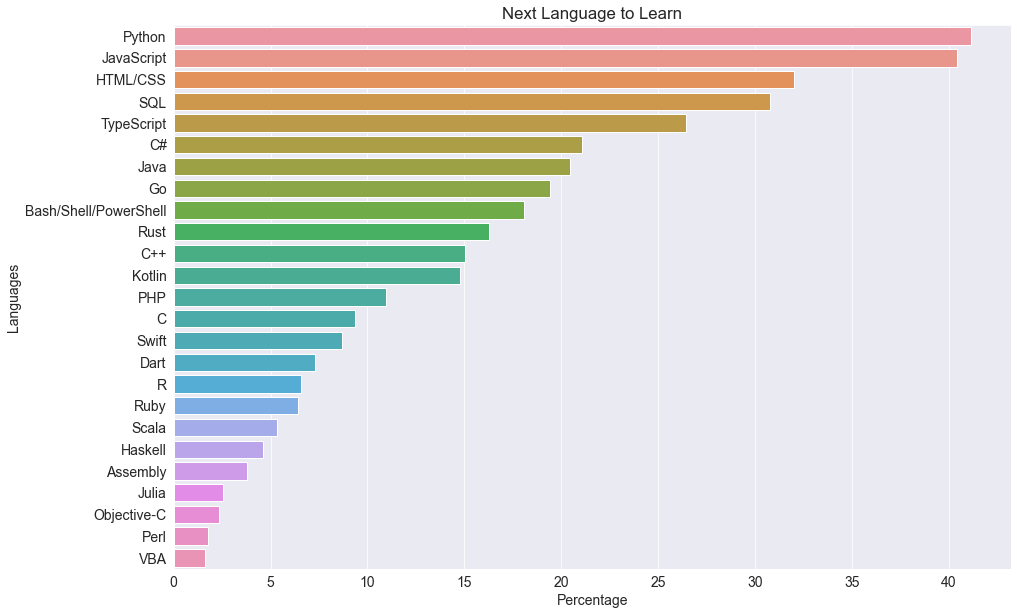

In [887]:
plt.figure(figsize=(15,10))
plot = sns.barplot(x=new_lang,y=new_lang.index);
plot.set(xlabel='Percentage', ylabel='Languages', title='Next Language to Learn');

It's not surprising as many people want to learn Python since it keeps gaining more popularity and it is easy-to-learn general purpose programming language. 

In [888]:
schema_df.QuestionText.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

**Q: Which of the languages is the most loved language i.e., a high percentage number of people who have used the language will like to continue learning and using it over the next year**

In [889]:
schema_df.QuestionText.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [890]:
lang_work = split_multicolumn(survey_df.LanguageWorkedWith)
interest_lang = split_multicolumn(survey_df.LanguageDesireNextYear)

In [891]:
loved_lang = lang_work & interest_lang
loved_lang

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [892]:
estm = loved_lang.sum()*100/lang_work.sum()
estm = estm.sort_values(ascending=False)

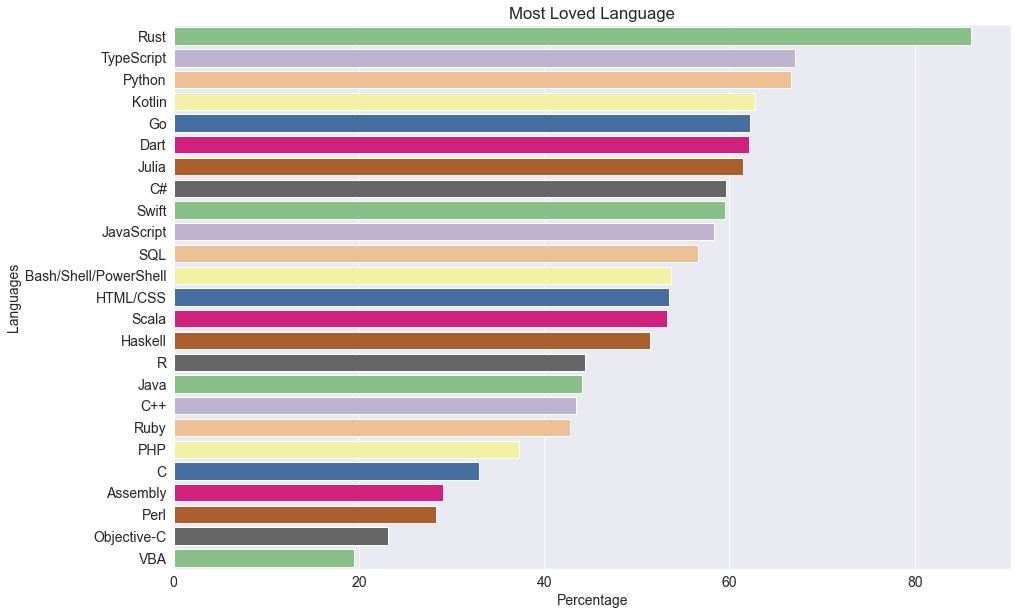

In [893]:
plt.figure(figsize=(15,10))
plt.title('Most Loved Language')
sns.barplot(x=estm, y=estm.index, palette='Accent');
plt.xlabel('Percentage')
plt.ylabel('Languages');

Rust has been the most loved language on Stackoverflow for years, followed by Typscript which is seen as a better alternative for JavaScript.

**Q: Most dreaded language i.e., the language people used in the past and  not interested in learning or using over next year.**

In [894]:
not_interest = interest_lang[interest_lang[interest_lang.columns]==False].count().sort_values(ascending=False)
not_interest = not_interest*100/not_interest.sum()

In [895]:
not_interest

VBA                      4.613032
Perl                     4.605960
Objective-C              4.578910
Julia                    4.569432
Assembly                 4.511979
Haskell                  4.473191
Scala                    4.438850
Ruby                     4.387302
R                        4.380449
Dart                     4.345889
Swift                    4.280999
C                        4.249721
PHP                      4.175279
Kotlin                   3.996503
C++                      3.984619
Rust                     3.925707
Bash/Shell/PowerShell    3.841933
Go                       3.777481
Java                     3.729068
C#                       3.701217
TypeScript               3.448364
SQL                      3.244507
HTML/CSS                 3.186908
JavaScript               2.793192
Python                   2.759508
dtype: float64

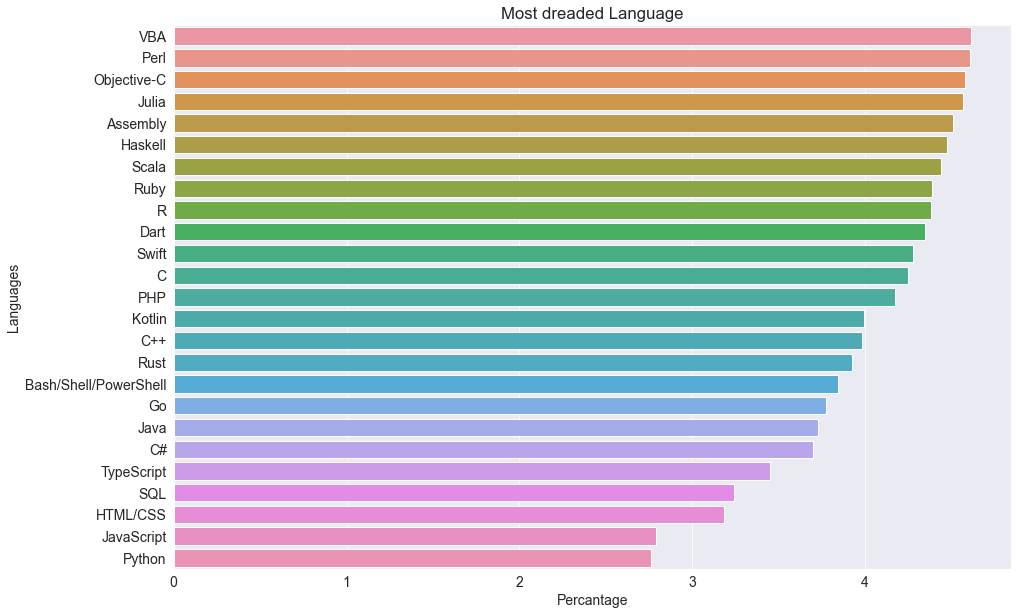

In [896]:
plt.figure(figsize=(15,10))
plt.title('Most dreaded Language')
plot = sns.barplot(x=not_interest, y=not_interest.index)
plot.set(xlabel='Percantage', ylabel='Languages');

Since Python is the top language that interest people the most (to learn over next year), it is expected to come last here. Obviously, VBA is the most dreadful language.

**Q: Which country does the developers work the highest number of hours per week? Consider the country with more than 250 responses only.**

In [897]:
cotry_workwh= survey_df.groupby('Country')['WorkWeekHrs'].mean().sort_values(ascending=False).to_frame()

In [898]:
country_count = survey_df['Country'].value_counts() > 250
country_count = country_count[country_count==True].index
country_count

Index(['United States', 'India', 'United Kingdom', 'Germany', 'Canada',
       'France', 'Brazil', 'Netherlands', 'Poland', 'Australia', 'Spain',
       'Italy', 'Russian Federation', 'Sweden', 'Pakistan', 'Turkey', 'Israel',
       'Switzerland', 'Romania', 'Bangladesh', 'Nigeria', 'Mexico', 'Ukraine',
       'Austria', 'Czech Republic', 'Indonesia', 'South Africa', 'Iran',
       'Belgium', 'Ireland', 'Philippines', 'Argentina', 'Greece', 'Denmark',
       'Portugal', 'Norway', 'Hungary', 'China', 'Viet Nam', 'New Zealand',
       'Finland', 'Bulgaria', 'Serbia', 'Japan', 'Sri Lanka', 'Colombia',
       'Egypt', 'Kenya'],
      dtype='object')

In [915]:
cotry_workwh.loc[country_count].sort_values(by='WorkWeekHrs',ascending=False)

,WorkWeekHrs
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245
New Zealand,40.457551


**Average working hours around the around**

In [921]:
survey_df.WorkWeekHrs[survey_df.WorkWeekHrs.notnull()].mean()

40.026994884802576

Iran has the highest working hours per week

In [900]:
cotry_workwh.loc[survey_df.Country.value_counts()>250].head(15)

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


**Q: How important is it to start young in building a career in programming?**

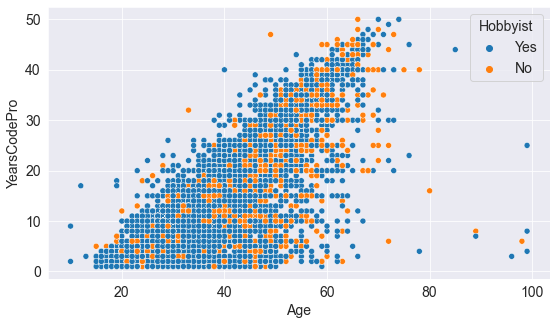

In [901]:
sns.scatterplot(x='Age', y='YearsCodePro',hue='Hobbyist', data=survey_df);

This shows one could start programming at any age even, less than 20. Many of the respondants find programing as hobby.

Let's check out when most people first code:

C:\Users\ACER\Untitled Folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


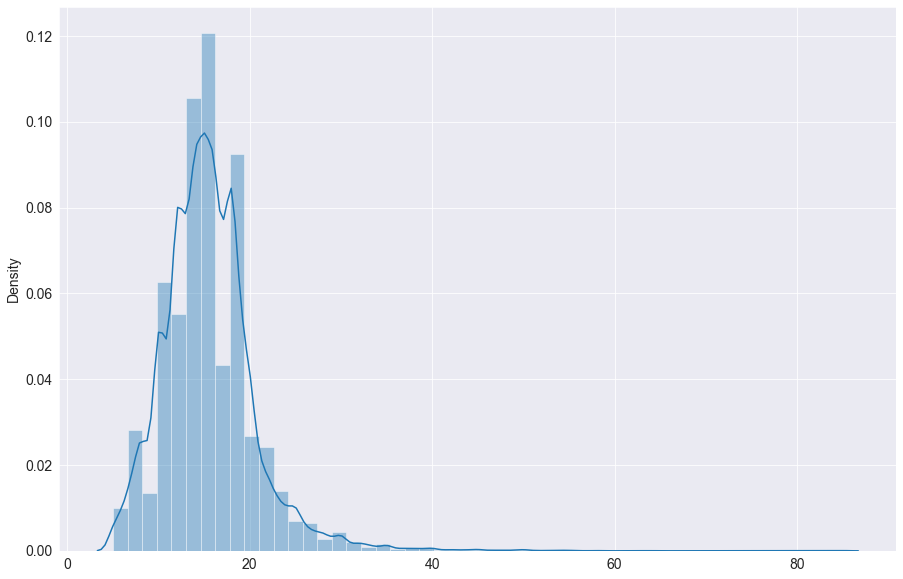

In [902]:
plt.figure(figsize=(15,10))
sns.distplot(x=survey_df.Age1stCode);

Most people had the first experience before the age 40 but there are people at all ages learning. 

**Q: What's different among respondant by comparing their years of experience? Let's check out a trend!**

In [903]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,"(18.0, 30.0]"
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,"(30.0, 45.0]"


In [904]:
schema_df.QuestionText.YearsCode

'Including any education, how many years have you been coding in total?'

> Years of code of respondants with their employment status;

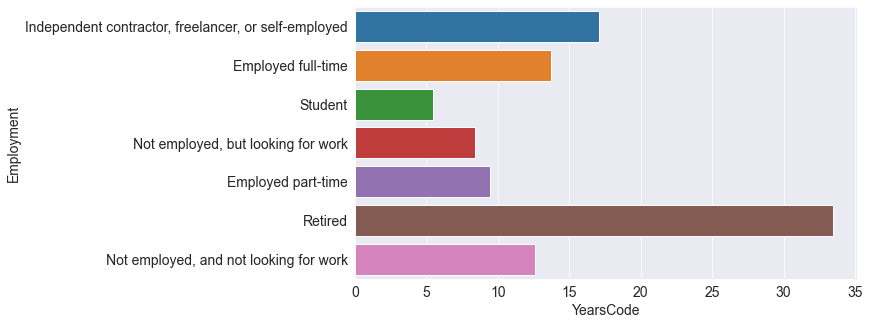

In [905]:
sns.barplot(x=survey_df.YearsCode, y=survey_df.Employment, ci=0);

This analysis says a lot. Developer with more than 30 years of experience is close to retirement.

> Country with highest number of respondants with more than 10 years of coding experience;

In [906]:
than10yrsE = survey_df[survey_df['YearsCode'] > 10]
than10yrsE.groupby('Country')['YearsCode'].count().sort_values(ascending=False)

Country
United States       6403
Germany             2057
United Kingdom      2027
India               1442
Canada              1052
                    ... 
Angola                 1
Papua New Guinea       1
Yemen                  1
Mozambique             1
Guyana                 1
Name: YearsCode, Length: 153, dtype: int64

Obviously, US top the list. It's not surprising as India is among the first five, the number of Indians in programming field are enormous.

> Between men and women, who has the highest number of developer with more than 10 years experience? Let's see...

In [907]:
than10yrsE.groupby('Gender')['YearsCode'].count().sort_values(ascending=False)

Gender
Man                                                  21544
Woman                                                 1230
Non-binary, genderqueer, or gender non-conforming      164
Name: YearsCode, dtype: int64

Men always top this list as majority of young men find programming as an interesting field that could take their career to different level.

> Top 5 most used languages by developers with more than 10 years of experiences;

In [908]:
yrs_lang = survey_df[['YearsCode']].join(language)
yrs_lang[yrs_lang.YearsCode > 10].drop('YearsCode', axis=1).sum().sort_values(ascending=False).head()

JavaScript               16654
HTML/CSS                 14725
SQL                      14380
Bash/Shell/PowerShell    10107
Python                   10095
dtype: int64

> Top 5 most used languages by developers with less than 10 years of experiences;

In [909]:
yrs_lang[yrs_lang.YearsCode < 10].drop('YearsCode', axis=1).sum().sort_values(ascending=False).head()

JavaScript    16469
HTML/CSS      16012
SQL           12558
Python        11427
Java          10493
dtype: int64

> Top 5 most loved languages by developers with more than 10 years of experiences;

In [910]:
love_langE = survey_df[['YearsCode']].join(loved_lang)
love_langE = yrs_lang

In [911]:
yrs_lang[yrs_lang.YearsCode > 10].drop('YearsCode', axis=1).sum().sort_values(ascending=False).head()

JavaScript               16654
HTML/CSS                 14725
SQL                      14380
Bash/Shell/PowerShell    10107
Python                   10095
dtype: int64

# **Inferences and Conclusion**

Through the analysis of the survey report, the following were deducted as insight;
- United State has the highest number of respondants on stackoverflow among all countries that participated in the survey. It's not surprising as the official language used on stackoverflow is English.
- More than 60% of the repondants speaks English in their country / has English in their Languages.
- The age range of most respondants is between 25-30. More youths are diving into the community every year, majority of people on stackoverflow are youth.
- 91.6% of the respondants are men which claim the fact that, majority of programmers/developer on Stackoverflow are men.
- Majority of the respondants are Bachelor’s degree (B.A., B.S., B.Eng., etc.) holder which explained that, more youth are engaging in the commuinty.
- Highest number of respondants studied/studying Computer science, computer engineering, or software engineering, followed by other Engineering discipline and from the chart of Undergrad, it shows decrease interest in programming as the field relation with tech diminishing.
- Respondants in the field of  Computer science, computer engineering, or software engineering believe less that studying the course hold more importancy in starting a career in programming compare to others in different field.
- Majority of the respondants are employed full-time. This shows us that, there are more employment opportunity in programming career.
- 11.12% of the respondants are working in a Data related field. While 67.09% of the respondants are working as a developer. There are more developer on stackoverflow than any other role.
- There are more women working as a developer compare to other roles, same thing goes with men (especially as a full-stack developer).
- Higer percentage of the respondants are at least satisfied with their current job while majority of the higher percenatge are very satisfied.
- When seeking job, the important factor that matter the most to large number of the respondants is 'Languages, frameworks, and other technologies they would be working with'.
- Of course, it's a Stackoverflow survey, majority of the respondants run to stackoverflow when stucked on a problem.
- JavaScript has the highest number of votes on the programming language the respondants enjoyed using.
- JavaScript is the most popular programmig language on Stackoverflow as web development is one of the most sought skill today.
- SQL is the most common language among data science related field used by respondants working in related field.
- It's not surprising as many people want to learn Python since it keeps gaining more popularity and it is easy-to-learn general purpose programming language. A lot of respondants are willing to learn python as it is widely used today.
- Rust has been the most loved language on Stackoverflow for years, followed by Typscript which is seen as a better alternative for JavaScript.
- Iran has the highest working hours per week among all countries involved in the survey.
- Programmer / developer with more than 30 years of experience is likely close to retirement.
- US has the highest number of respondants with more than 10 years of experience.
- Programmers around the world are working 40 hours per week on average.
- You can start to learn programming at any age and you will progress more better if you enjoy programming as hobby.

In [923]:
import jovian 

In [925]:
project = 'Stackoverflow_survey_EDA'
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "yusuflaaro/Stackoverflow_survey_EDA"
[jovian] Committed successfully! https://jovian.ai/yusuflaaro/stackoverflow-survey-eda


'https://jovian.ai/yusuflaaro/stackoverflow-survey-eda'